In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('HR_data.csv')
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,...,3,4,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,0,33,5,1,29,8,11,10.0
1419,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,3,...,3,4,0,22,5,4,18,13,13,11.0
1420,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,0,10,1,3,2,2,2,2.0
1421,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,2,...,3,2,1,12,3,3,11,7,1,9.0


In [3]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
# 先做 Ordinal encoding 
ordinal_cols = ['AgeGroup', 'SalarySlab']
encoder = OrdinalEncoder()
x[ordinal_cols] = encoder.fit_transform(x[ordinal_cols])

# One-hot encoding
x = pd.get_dummies(x, columns=['BusinessTravel', 'Department', 'EducationField',
                               'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
                   drop_first=True)

In [5]:
x

,Age,AgeGroup,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,18,0.0,230,3,3,3,54,3,1,3,...,True,False,False,False,False,False,False,False,True,False
1,18,0.0,812,10,3,4,69,2,1,3,...,False,False,False,False,False,False,True,False,True,False
2,18,0.0,1306,5,3,2,69,3,1,2,...,False,False,False,False,False,False,True,False,True,True
3,18,0.0,287,5,2,2,73,3,1,4,...,False,False,False,False,True,False,False,False,True,False
4,18,0.0,247,8,1,3,80,3,1,3,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,60,4.0,422,7,3,1,41,3,5,1,...,False,True,False,False,False,False,False,True,False,False
1419,60,4.0,1499,28,3,3,80,2,3,1,...,False,False,False,False,False,True,False,True,False,False
1420,60,4.0,1179,16,4,1,84,3,2,1,...,False,False,False,False,False,True,False,False,True,False
1421,60,4.0,696,7,4,2,52,4,2,4,...,False,False,False,False,False,True,False,False,False,True


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

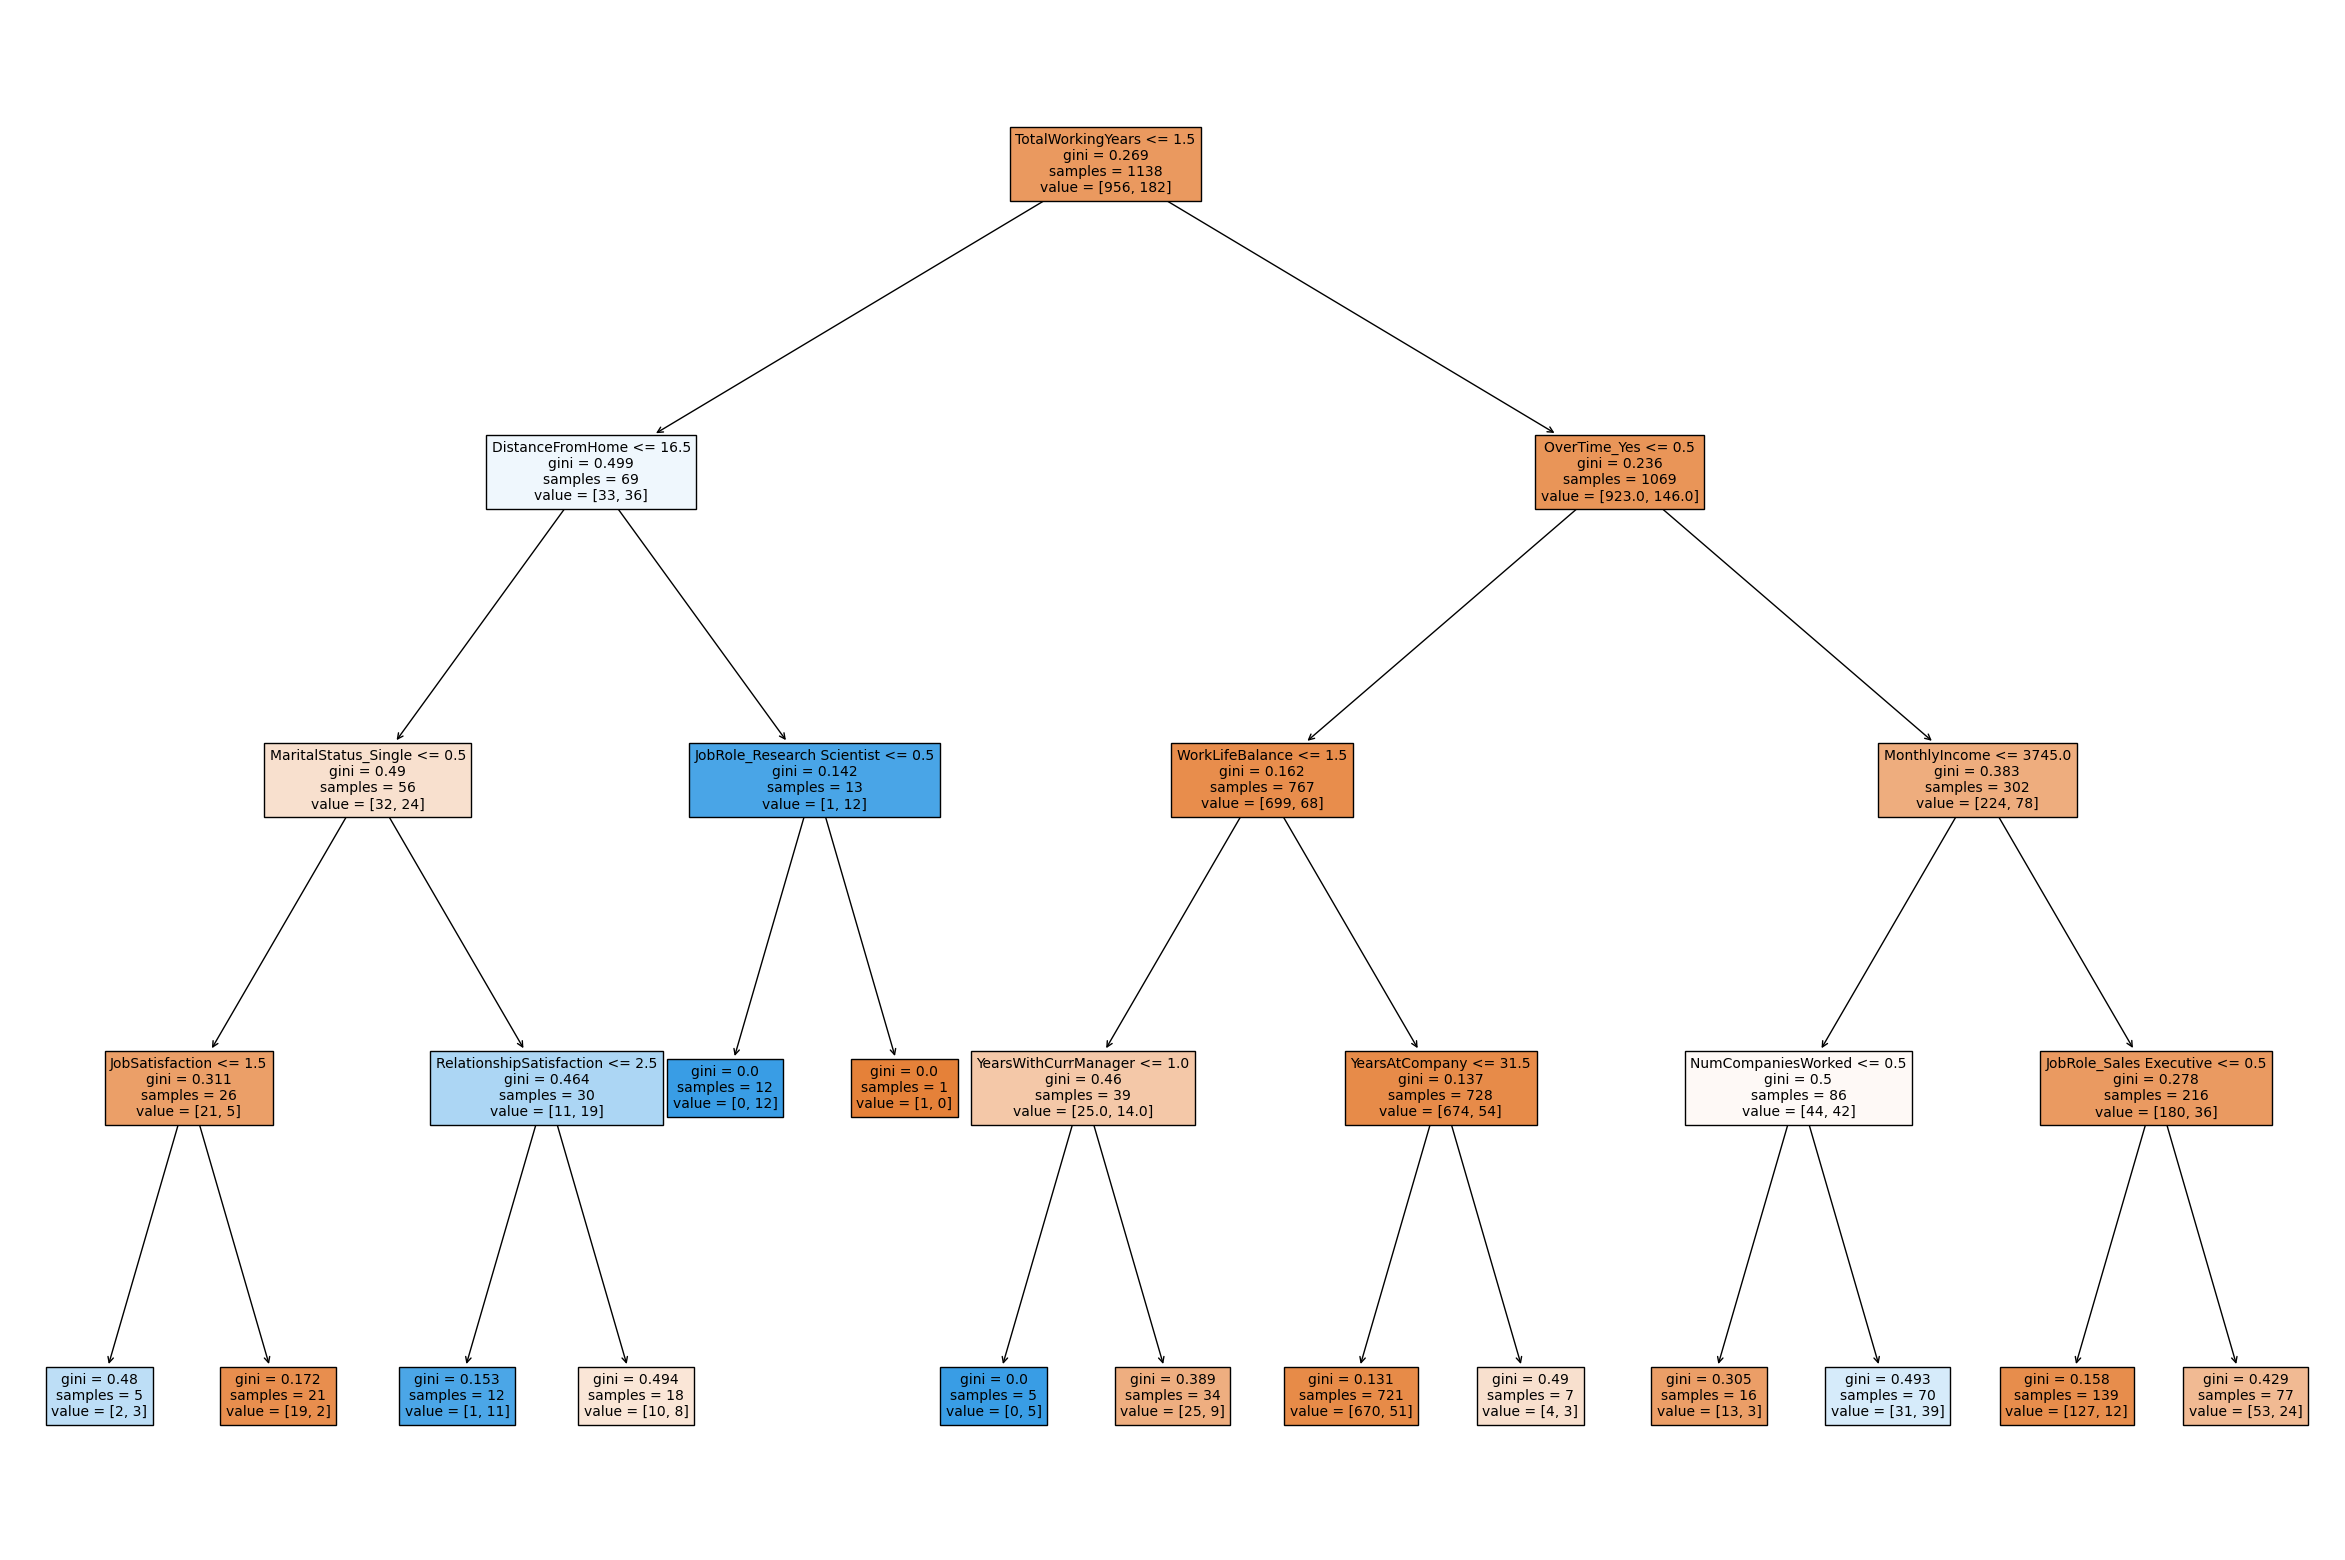

In [8]:
plt.figure(figsize=(30,20))
plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)
plt.show()

/var/folders/dn/6ynt_kvj7q16x61wy32n8bmr0000gn/T/ipykernel_38186/2997076094.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


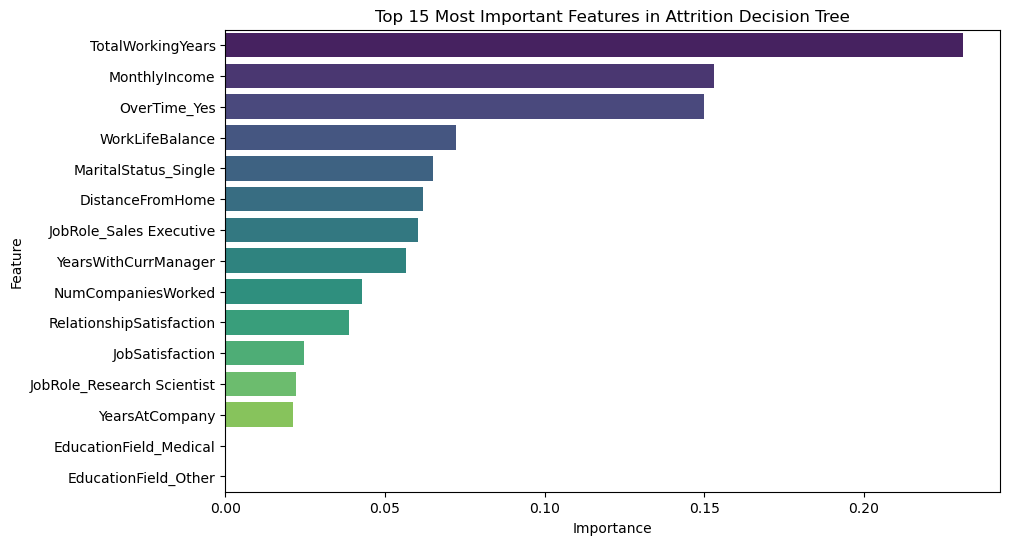

,Feature,Importance
18,TotalWorkingYears,0.231113
10,MonthlyIncome,0.153008
46,OverTime_Yes,0.149843
20,WorkLifeBalance,0.072165
45,MaritalStatus_Single,0.065116
3,DistanceFromHome,0.062012
42,JobRole_Sales Executive,0.060485
24,YearsWithCurrManager,0.056645
13,NumCompaniesWorked,0.042770
16,RelationshipSatisfaction,0.038590


In [9]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 顯示前 15 名
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features in Attrition Decision Tree')
plt.show()

importance_df.head(15)

In [10]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

# 預測
y_pred = nb.predict(x_test)

# eval result
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.71      0.80       237
         Yes       0.32      0.67      0.43        48

    accuracy                           0.71       285
   macro avg       0.62      0.69      0.62       285
weighted avg       0.81      0.71      0.74       285

[[169  68]
 [ 16  32]]


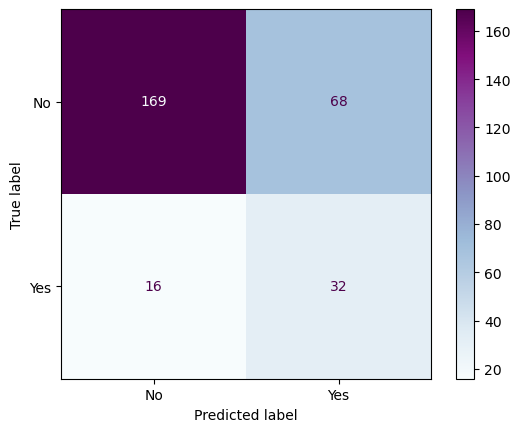

In [11]:
plot_cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=plot_cm, display_labels=labels)
disp.plot(cmap='BuPu')
plt.show()